# **Soil Fertility**

Use elemetal soil analysis to determine the fertility of the soil.

**Input**

1. N - ratio of Nitrogen (NH4+) content in soil

2. P - ratio of Phosphorous (P) content in soil

3. K - ratio of Potassium (K) content in soil

4. ph - soil acidity (pH)

5. ec - electrical conductivity

6. oc - organic carbon

7. S - sulfur (S)

8. zn - Zinc (Zn)

9. fe - Iron (Fe)

10. cu - Copper (Cu)

11. Mn - Manganese (Mn)

12. B - Boron (B)


**Output**

*   Class fertility (0 "Less Fertile", 1 "Fertile", 2 "Highly Fertile")



# Import Liberaries and Modules

In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# leading the data

In [ ]:
# reading the dataset
PATH_DATA = '/content/soil_fertility.csv'
df = pd.read_csv(PATH_DATA)
df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [ ]:
df.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Checking/handling for any missing value
threshold = 0.5 * len(df)
df.dropna(axis=1, thresh=threshold, inplace=True)

for col in df.columns:
    if df[col].isnull().sum() > 0:
        X = df.dropna().drop(columns=[col])
        y = df.dropna()[col]
        model = RandomForestRegressor()
        model.fit(X, y)
        df.loc[df[col].isnull(), col] = model.predict(df[df[col].isnull()].drop(columns=[col]))

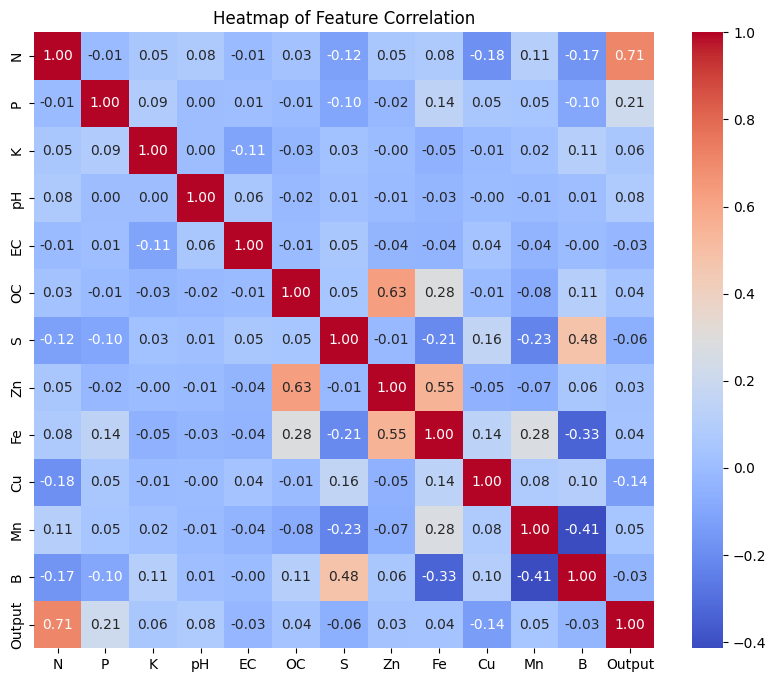

In [ ]:
# Create heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlation')
plt.show()

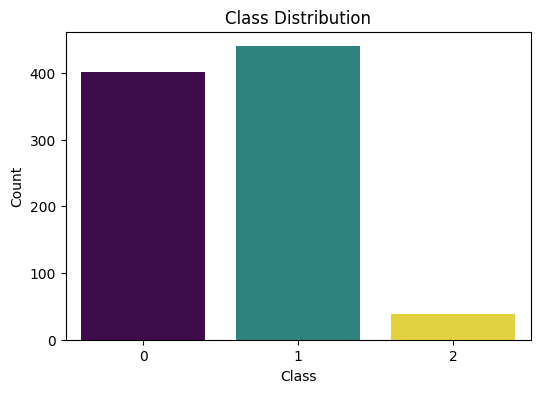

In [ ]:
# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Output', data=df, hue='Output', palette='viridis', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Class balancing
Due to the high level of class imbalance we need to balance the class to make our data mode effective on our model

In [ ]:
# Apply SMOTE to balance class distribution
X = df.drop(columns=['Output'])
y = df['Output']
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Output'] = y_resampled

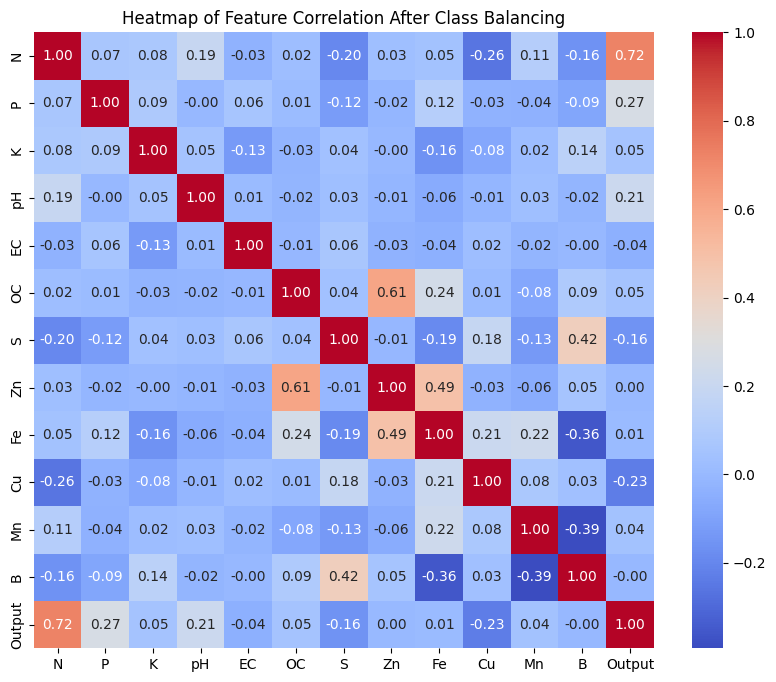

In [ ]:
# Create heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_balanced.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlation After Class Balancing')
plt.show()

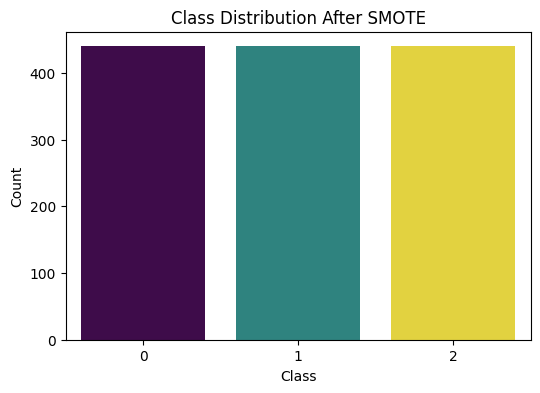

In [ ]:
# Visualize class distribution after balancing
plt.figure(figsize=(6, 4))
sns.countplot(x='Output', data=df_balanced, hue='Output', palette='viridis', legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Data splitting

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

## Training random forest model

In [ ]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
import joblib
joblib.dump(rf_model, 'models/initial_model.pkl')
print("Model saved successfully to models/initial_model.pkl")

: 

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9205
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        88
           1       0.93      0.88      0.90        88
           2       0.96      0.93      0.95        88

    accuracy                           0.92       264
   macro avg       0.92      0.92      0.92       264
weighted avg       0.92      0.92      0.92       264



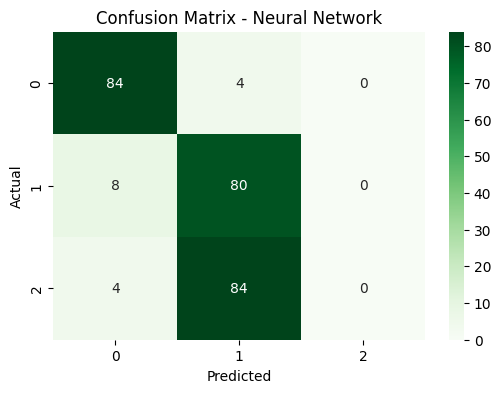

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions with the Neural Network model
y_pred_nn = (rf_model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix for Neural Network
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Training logistic regression model

In [ ]:
# Scale the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions with Logistic Regression
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')
print('Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7462
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        88
           1       0.65      0.66      0.66        88
           2       0.72      0.70      0.71        88

    accuracy                           0.75       264
   macro avg       0.75      0.75      0.75       264
weighted avg       0.75      0.75      0.75       264



# Training using GridSearch

In [ ]:
# Hyperparameter tuning for Random Forest using GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Make predictions with the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Optimized Random Forest Accuracy: {accuracy_rf:.4f}')
print('Optimized Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))

Optimized Random Forest Accuracy: 0.9242
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        88
           1       0.92      0.90      0.91        88
           2       0.98      0.93      0.95        88

    accuracy                           0.92       264
   macro avg       0.93      0.92      0.92       264
weighted avg       0.93      0.92      0.92       264



In [ ]:
# Scale the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression using GridSearchCV
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
log_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), log_params, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train_scaled, y_train)
best_log_reg = log_grid.best_estimator_

# Make predictions with the best Logistic Regression model
y_pred_lr = best_log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Optimized Logistic Regression Accuracy: {accuracy_lr:.4f}')
print('Optimized Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_lr))

Optimized Logistic Regression Accuracy: 0.7197
Optimized Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        88
           1       0.67      0.50      0.57        88
           2       0.68      0.73      0.70        88

    accuracy                           0.72       264
   macro avg       0.71      0.72      0.71       264
weighted avg       0.71      0.72      0.71       264



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build a Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3256 - loss: 0.4815 - val_accuracy: 0.3333 - val_loss: -0.0062
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3686 - loss: -0.1754 - val_accuracy: 0.3447 - val_loss: -0.7266
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3809 - loss: -0.8375 - val_accuracy: 0.4167 - val_loss: -1.8925
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4515 - loss: -2.1961 - val_accuracy: 0.4659 - val_loss: -4.1031
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4666 - loss: -5.2622 - val_accuracy: 0.5038 - val_loss: -8.1102
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4889 - loss: -9.6487 - val_accuracy: 0.5152 - val_loss: -14.7330
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4989 - loss: -19.0319 - val_accuracy: 0.5303 - val_loss: -25.3216
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5112 - loss: -30.4865 - val_accuracy: 0.5455 - v

In [ ]:
# Evaluate the Neural Network model
loss, accuracy_nn = model.evaluate(X_test_scaled, y_test)
print(f'Neural Network Accuracy: {accuracy_nn:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5777 - loss: -12087.2002 
Neural Network Accuracy: 0.5606


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


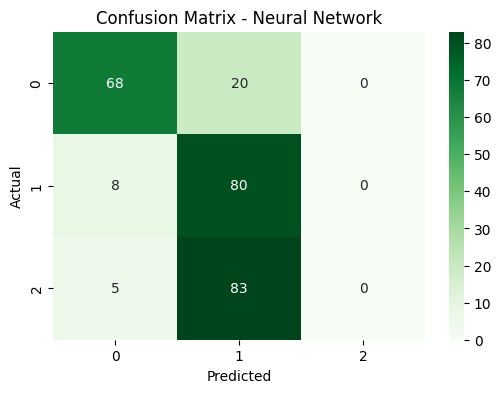

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions with the Neural Network model
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)

# Confusion Matrix for Neural Network
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()